In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import time, datetime, calendar

In [2]:
data = pd.read_csv('digit recognizor.csv')

In [3]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data.shape

(42000, 785)

In [5]:
x = data.iloc[:,1:]
y = data.iloc[:,0]

In [6]:
x.shape

(42000, 784)

# 過濾法

In [7]:
#方差過濾
x_varfilter = VarianceThreshold().fit_transform(x)

In [8]:
x_varfilter.shape

(42000, 708)

In [9]:
#刪除方差在x.var().median()以下的特徵
x_varfilter_median = VarianceThreshold(x.var().median()).fit_transform(x)

In [10]:
x_varfilter_median.shape

(42000, 392)

In [11]:
a = time.time()
score_old = cross_val_score(RandomForestClassifier(n_estimators=10, random_state=1),x,y, cv = 5).mean()
print(score_old)
b = time.time()
print(b - a)

0.9381432010052206
16.34066128730774


In [12]:
a = time.time()
score_new = cross_val_score(RandomForestClassifier(n_estimators=10, random_state=1), x_varfilter_median, y, cv=5).mean()
print(score_new)
b = time.time()
print(b - a)

0.9397388305201974
17.33609390258789


In [62]:
#相關性過濾(卡方過濾: chi2, F檢驗-ANOVA: f_classif/f_regression 捕捉特徵與標籤間的線性關係, 互信息法: mutual_info_classif/mutual_info_regression 捕捉線性和非線性關係)
from sklearn.feature_selection import chi2, SelectKBest

In [14]:
x_chi = SelectKBest(chi2, k=300).fit_transform(x_varfilter_median, y)
x_chi.shape

(42000, 300)

In [15]:
cross_val_score(RandomForestClassifier(n_estimators=10, random_state=1), x_chi, y, cv = 5).mean()

0.9316192314893644

In [18]:
chivalue, pvalue = chi2(x_varfilter_median, y)
pvalue.sum()

0.0

# 嵌入法

In [19]:
from sklearn.feature_selection import SelectFromModel

In [31]:
RFC= RandomForestClassifier(random_state=1, n_estimators=10).fit(x,y)
RFCscore = RFC.score(x,y)
RFCscore

0.9991190476190476

In [32]:
RFC.feature_importances_

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.53227234e-05, 0.00000000e+00, 0.00000000e+00,
       1.04247844e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       4.52091615e-06, 6.17509309e-06, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [25]:
RFC = RandomForestClassifier(n_estimators=10, random_state=1)
embedded = SelectFromModel(RFC, threshold=0.005).fit_transform(x,y)

In [26]:
embedded.shape

(42000, 51)

In [33]:
 (RFC.feature_importances_).max()

0.01563162660506957

In [45]:
RFC = RandomForestClassifier(n_estimators=8, random_state=1).fit(x,y)
threshold = np.linspace(0, RFC.feature_importances_.max(), 20)

In [47]:
threshold

array([0.        , 0.00086643, 0.00173287, 0.0025993 , 0.00346573,
       0.00433216, 0.0051986 , 0.00606503, 0.00693146, 0.0077979 ,
       0.00866433, 0.00953076, 0.01039719, 0.01126363, 0.01213006,
       0.01299649, 0.01386292, 0.01472936, 0.01559579, 0.01646222])

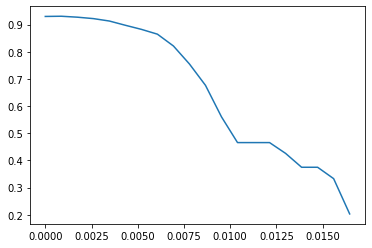

In [46]:
score = []
for i in threshold:
    RFC = RandomForestClassifier(n_estimators=8, random_state=1)
    embedded = SelectFromModel(RFC, threshold=i).fit_transform(x,y)
    score.append(cross_val_score(RFC, embedded, y, cv = 5).mean())
plt.plot(threshold, score)
plt.show()

# 包裝法

In [48]:
from sklearn.feature_selection import RFE

In [49]:
RFC = RandomForestClassifier(n_estimators=10, random_state=1)
selector = RFE(RFC, n_features_to_select=340, step=50).fit(x,y)

In [56]:
selector.support_.sum()

340

In [57]:
x_wrap = selector.transform(x)

In [58]:
cross_val_score(RFC, x_wrap, y, cv=5).mean()

0.9386908115990413

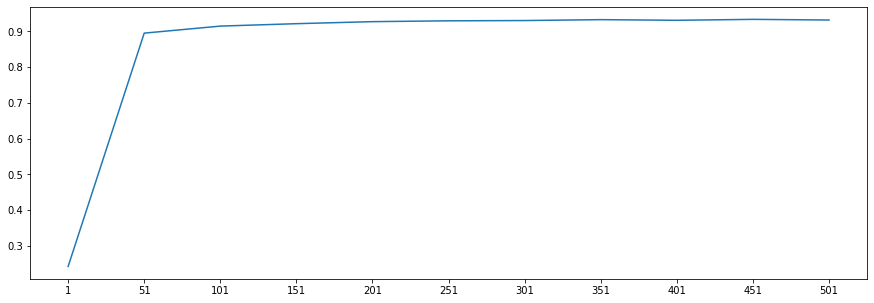

In [61]:
score = []
for i in range(1,502, 50):
    RFC = RandomForestClassifier(random_state=1, n_estimators=8)
    x_wrap = RFE(RFC, n_features_to_select=i, step=50).fit_transform(x,y)
    once = cross_val_score(RFC, x_wrap, y, cv=5).mean()
    score.append(once)
plt.figure(figsize=[15,5])
plt.plot(range(1,502,50), score)
plt.xticks(range(1,502,50))
plt.show()